In [1]:
# importing the dataset  

import pandas as pd

df =  pd.read_csv('SMSSpamCollection', sep = '\t', names = ["label", "message"])

In [2]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [4]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.label)
plt.title('Number of ham and spam messages')
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1}).astype(int)
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df_ham = df[df['label']==0].copy()
df_spam = df[df['label']==1].copy()

In [8]:
from wordcloud import WordCloud, STOPWORDS

def Wordcloud_IMG(df_class, name):
    text = ' '.join(df_class['message'].astype(str).tolist())
    stopwords = set(STOPWORDS)
    
    fig_wordcloud = WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(name, fontsize=20 )
    plt.show()

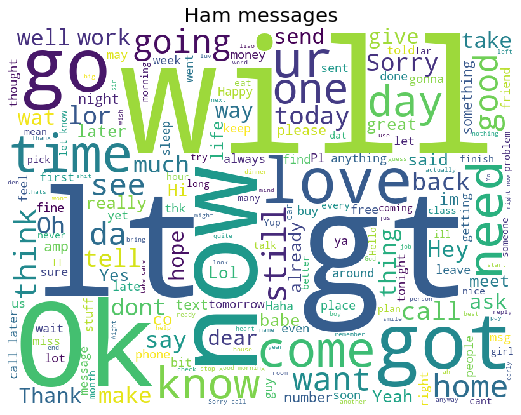

In [9]:
Wordcloud_IMG(df_ham, "Ham messages")

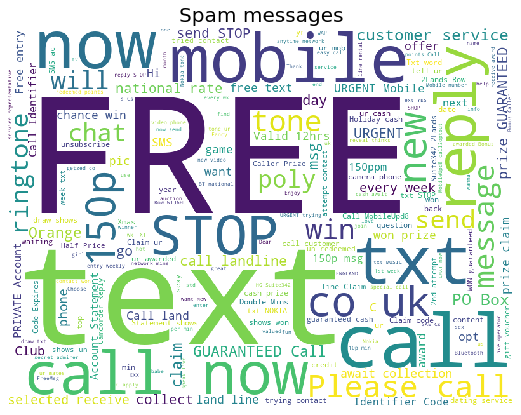

In [10]:
Wordcloud_IMG(df_spam, "Spam messages")

In [11]:
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet, stopwords

# Text preprocessing 
def clean_message(msgs, pos):
    """ 
    Clean the message
    1.Remove all non-words
    2.transform words into lower case
    3.remove stop words
    4.perform stemming
    """
    msgs = re.sub("[^A-Za-z]", " ", msgs)
    msgs = msgs.lower()
    msgs = nltk.word_tokenize(msgs)
    lemmatizer = WordNetLemmatizer()
    msgs = [lemmatizer.lemmatize(msg,pos) for msg in msgs if not msg in stopwords.words('english')]
    #stemmer = PorterStemmer()
    #msgs = [stemmer.stem(msg) for msg in msgs if not msg in stopwords.words('english')]
    msgs = " ".join(msgs)
    return msgs

In [12]:
msgs = df.message[0]
print(msgs)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [13]:
cleaned_msg = clean_message(msgs, pos = wordnet.VERB)
print(cleaned_msg)

go jurong point crazy available bugis n great world la e buffet cine get amore wat


In [14]:
corpus = []

for i in range(0, len(df)):
    msgs = clean_message(df.message[i], pos = wordnet.VERB)
    corpus.append(msgs)

In [15]:
corpus[:4]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say']

In [16]:
from collections import Counter

df_new = pd.DataFrame({'Label':df['label'], 'message': corpus})

In [17]:
df_new.head()

,Label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf live around though


In [18]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Bag of words with CountVectorizer

In [19]:
# Bag of words with CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(corpus).toarray()

y = df_new['Label']

In [20]:
X.shape

(5572, 6653)

In [21]:
y.shape

(5572,)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [23]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [24]:
y_pred=spam_detect_model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", accuracy)

print("confusion_matrix:", cm)

Accuracy :  0.979372197309417
confusion_matrix: [[939  16]
 [  7 153]]


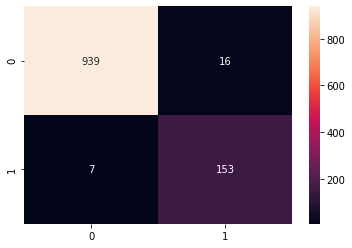

In [26]:
sns.heatmap(cm, annot=True, fmt="d")

## Term frequency inverse document frequency - TFIDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_id = TfidfVectorizer()

X_tf = tf_id.fit_transform(corpus)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size = 0.20, random_state = 0)

spam_detect_model_tf = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model_tf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", accuracy)

print("confusion_matrix:", cm)


Accuracy :  0.9704035874439462
confusion_matrix: [[955   0]
 [ 33 127]]


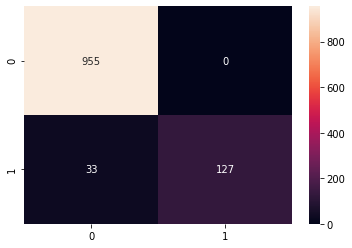

In [29]:
sns.heatmap(cm, annot=True, fmt="d")

In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

In [31]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       955
           1       1.00      0.79      0.89       160

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

